In [1]:
# Set project directory
import os
import sys


def project_dir():
    notebook_path = %pwd
    repo_name = "sisi"
    repo_folder = notebook_path.split(repo_name)[0]
    return os.path.join(repo_folder, repo_name)


pwd = os.getenv("PWD", project_dir())
os.environ["PWD"] = pwd
sys.path.append(pwd)

In [49]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from Utils.data_utils import load_train_test_data
from matplotlib import pyplot as plt
from pandas import Timestamp
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import time
import pickle
import warnings
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)

In [19]:
(train_list, test_list), state_list = load_train_test_data(pwd)

In [20]:
train = train_list[0]
test = test_list[0]

In [21]:
train = train.reset_index()
test = test.reset_index()

In [22]:
train.rename(columns = {'Date':'ds', 'carbon_per_MWh':'y'}, inplace = True)
test.rename(columns = {'Date':'ds', 'carbon_per_MWh':'y'}, inplace = True)

In [34]:
test['ds'] = test['ds'].apply(lambda x : x.replace(tzinfo=None))
train['ds'] = train['ds'].apply(lambda x : x.replace(tzinfo=None))

In [35]:
train

,ds,y
0,2018-07-03 05:00:00,428.530509
1,2018-07-03 06:00:00,430.069745
2,2018-07-03 07:00:00,486.440186
3,2018-07-03 08:00:00,512.173077
4,2018-07-03 09:00:00,510.579051
...,...,...
30615,2021-12-30 20:00:00,387.267303
30616,2021-12-30 21:00:00,371.341878
30617,2021-12-30 22:00:00,360.994811
30618,2021-12-30 23:00:00,370.312607


In [36]:
m = Prophet()
m.fit(train)

Initial log joint probability = -330.137


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       52097.9    0.00658224       504.439           1           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       52172.2    0.00973145        2824.4      0.6812      0.6812      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299         52195     0.0286834       4093.46     0.07366           1      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       52222.9    0.00107075       183.339           1           1      464   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499         52233    0.00171836       360.095     0.08696           1      584   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599     

In [37]:
forecast = m.predict(test)

In [42]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2021-12-31 01:00:00,331.904375,253.035656,407.630754
1,2021-12-31 02:00:00,327.977558,248.203160,409.896897
2,2021-12-31 03:00:00,316.755510,238.453158,398.626946
3,2021-12-31 04:00:00,301.928649,222.702411,386.077942
4,2021-12-31 05:00:00,287.920487,210.950843,374.358263


In [43]:
test

,ds,y
0,2021-12-31 01:00:00,412.899235
1,2021-12-31 02:00:00,394.983381
2,2021-12-31 03:00:00,373.891838
3,2021-12-31 04:00:00,343.876998
4,2021-12-31 05:00:00,325.939101
...,...,...
3744,2022-06-05 01:00:00,383.378933
3745,2022-06-05 02:00:00,385.614976
3746,2022-06-05 03:00:00,353.212714
3747,2022-06-05 04:00:00,318.043313


In [57]:
print(f"MAE: {np.mean(np.abs(test['y'] - forecast['yhat']))}")

MAE: 63.5680570215602


In [46]:
mean_squared_error(test['y'],forecast['yhat'])

6615.767590234493

In [50]:
mean_absolute_error(test['y'],forecast['yhat'])

63.5680570215602

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

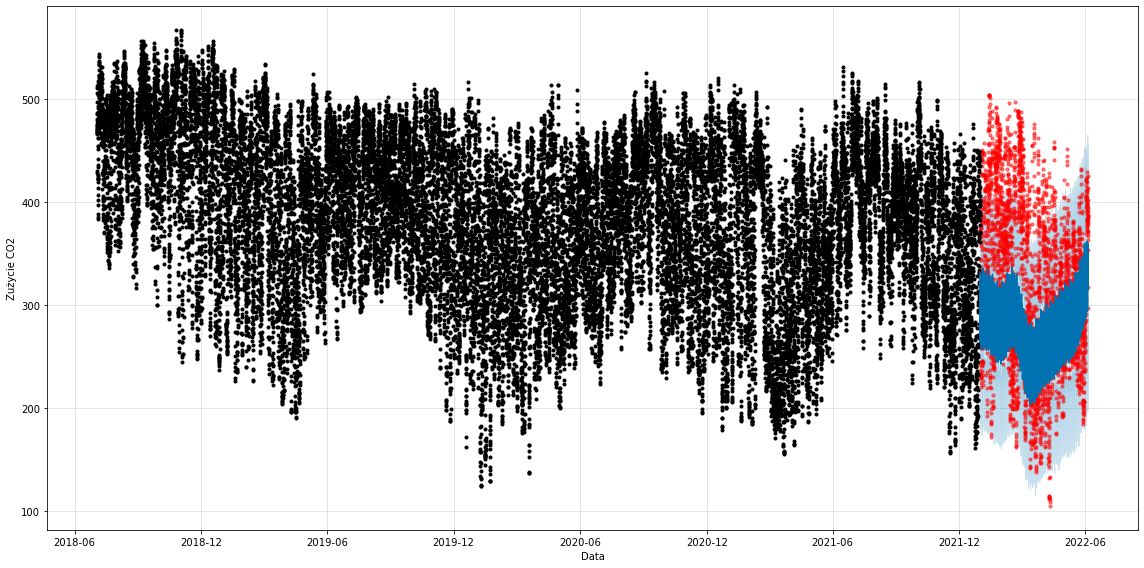

In [40]:
fig1 = m.plot(forecast, figsize=(16,8))
plt.scatter(test['ds'],test['y'], color='red', s=10, alpha = 0.5)
plt.xlabel("Data")
plt.ylabel("Zużycie CO2")
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

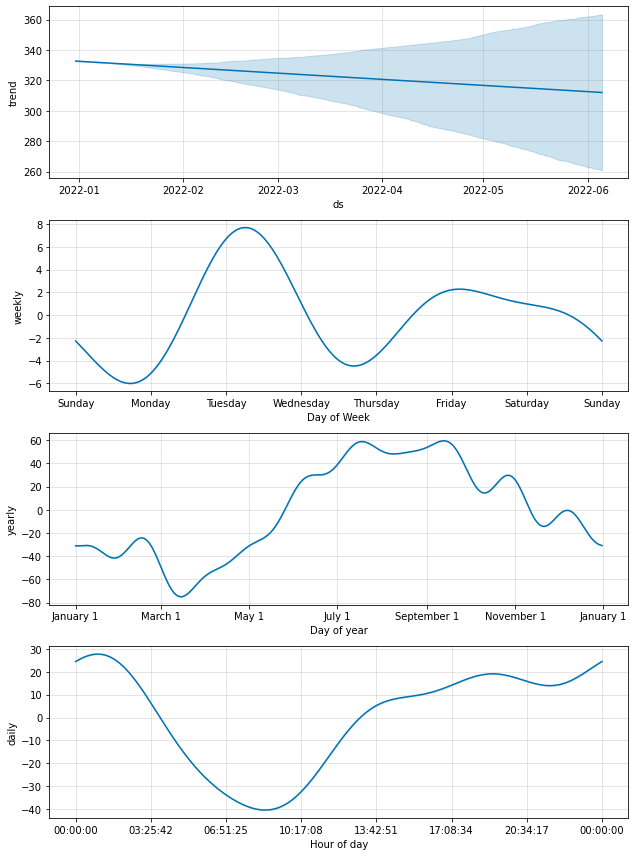

In [41]:
fig2 = m.plot_components(forecast)
plt.tight_layout